<a href="https://colab.research.google.com/github/sahana248/brain_tumour_MRI/blob/main/Brain_tumour_class_SahanaM_21076516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of deep learning models for MRI- Based brain tumour Classification.**


In this project, we aim to develop and evaluate deep learning models, including Graph Convolutional Networks (GCN) and Generative Adversarial Networks (GAN), for brain tumour classification using MRI images. Our approach involves training and fine-tuning these custom models on a labelled dataset of brain MRI scans. We will then compare their performance with pretrained models such as VGG19 and ResNet50. Evaluation metrics, including accuracy, precision, recall, F1-score, and ROC-AUC, will guide us in determining the effectiveness of each model.

# Background
This study explores the effectiveness of deep learning techniques on MRI images for the accurate classification of brain tumours. Brain tumours present major diagnostic challenges that require fast and accurate classification methods. The traditional manual examinations conducted by radiologists are labour-intensive and error-prone, which emphasizes the requirement for automated treatments.
This project will specifically discuss the pre-trained models, including VGG19 and ResNet50, and the traditional models, such as Graph Convolutional Networks (GCN) and Generative Adversarial Networks (GAN). While traditional models have the advantage of some features, including higher potential to enhance training outcomes and correlation analysis, on the other hand, pre-trained models benefit from extended training on huge datasets and intricate architectures. The research aims to find the most successful model, determining these models through the use of criteria like accuracy, precision, recall, F1-score, and ROC-AUC, which will enable the accurate and efficient categorization of more brain tumours in medical imaging.


# Dataset
The data was collected from Kaggle and the link to the dataset is:
https://www.kaggle.com/datasets/masoudnickparvar/brain-tumour-mri-dataset/data.

This data was available in Kaggle. It was created by an author named Msoud Nickparvar. The data was originally sourced from three different websites:
Source 1: https://figshare.com/articles/dataset/brain_tumour_dataset/1512427 - this contains 3064 T1-weighted contrast-enhanced images from 233 patients with three kinds of brain tumour.
Source 2: https://www.kaggle.com/sartajbhuvaji/brain-tumour-classification-mri/metadata - it contains of 3264 images split into training and test data. The dataset consists of images of three different types of brain tumour.
Source 3: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumour-detection/metadata - here there are 3865 images and the images are labelled as yes or no based on whether tumour is present or not.

This brain tumour MRI image dataset contains 7022 .jpg files categorized into glioma, meningioma, pituitary, and no tumour, divided into training and test sets. Sourced from three different sources, the dataset totals 156MB of memory space.

The dataset was ethically sourced and meets the requirements of GDPR and UH ethical policy. It is licensed under CC0 (Public Domain) and MIT licenses, ensuring broad usability while adhering to ethical and legal standards for data usage. These licenses permit free use, distribution, and modification of the dataset, facilitating its application in research, development, and educational projects while ensuring ethical compliance.

# Extracting the dataset
The dataset has been uploaded as a zip file in the google drive. We first need to mount the drive and unzip the file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/archive.zip'
extraction_dir = '/content/drive/MyDrive/brain_tumour'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

In [ ]:
import os

# List the contents of the Training directory
training_dir = os.path.join(extraction_dir, 'Training')
training_categories = os.listdir(training_dir)

# List the contents of the Testing directory
testing_dir = os.path.join(extraction_dir, 'Testing')
testing_categories = os.listdir(testing_dir)

# Output the categories
print("Training Categories:", training_categories)
print("Testing Categories:", testing_categories)

Training Categories: ['glioma', 'meningioma', 'notumor', 'pituitary']
Testing Categories: ['glioma', 'meningioma', 'notumor', 'pituitary']


From this we can identify that the training and testing files have been divided into 4 categories each.

# Data analysis
Now lets load our data, visualize category distributions, and display sample images

Category: glioma


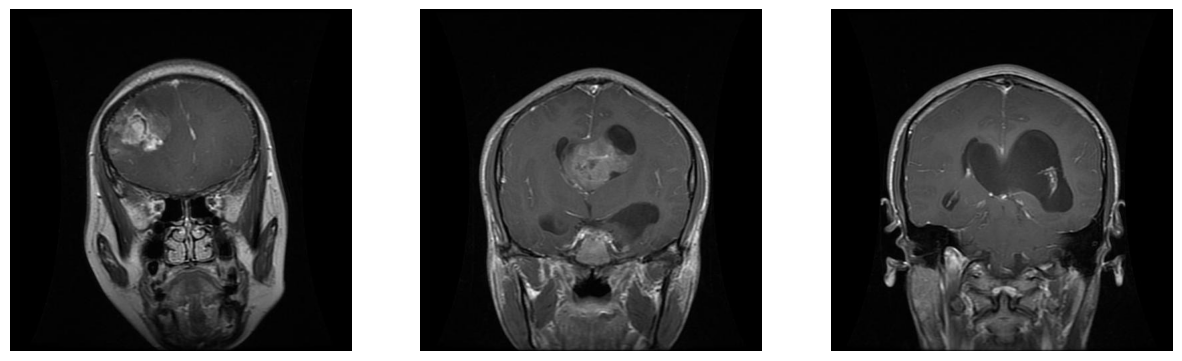

Category: meningioma


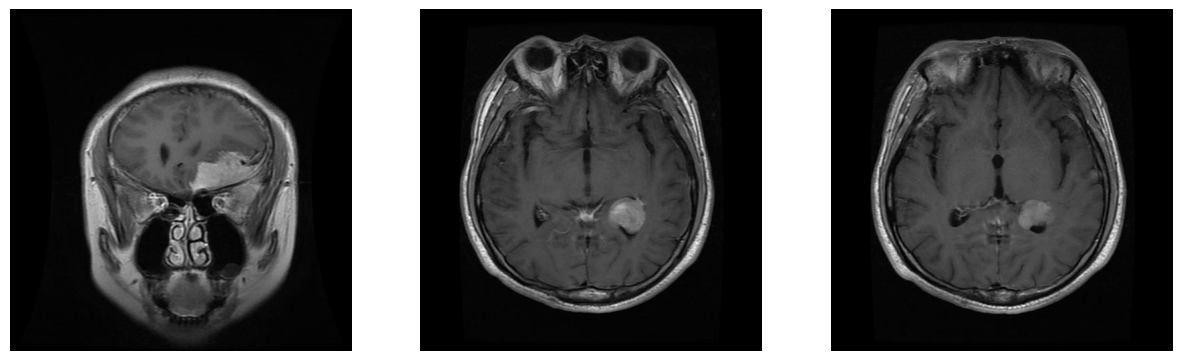

Category: notumor


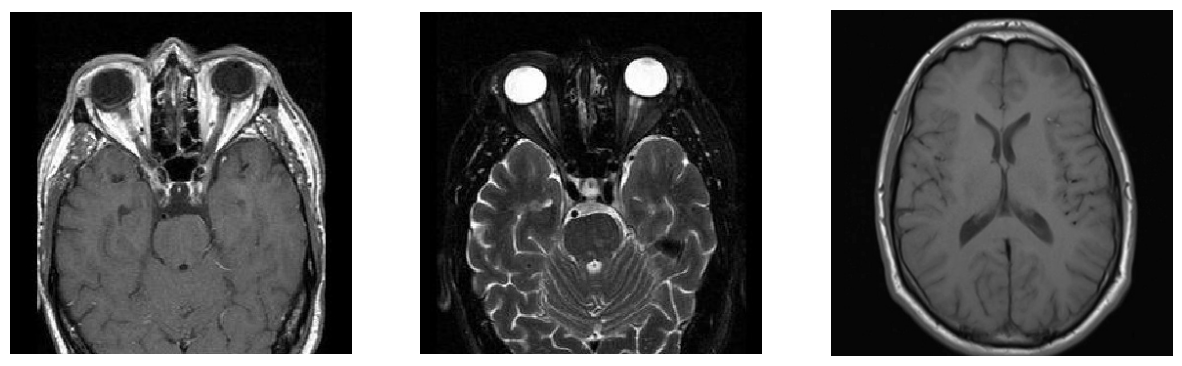

Category: pituitary


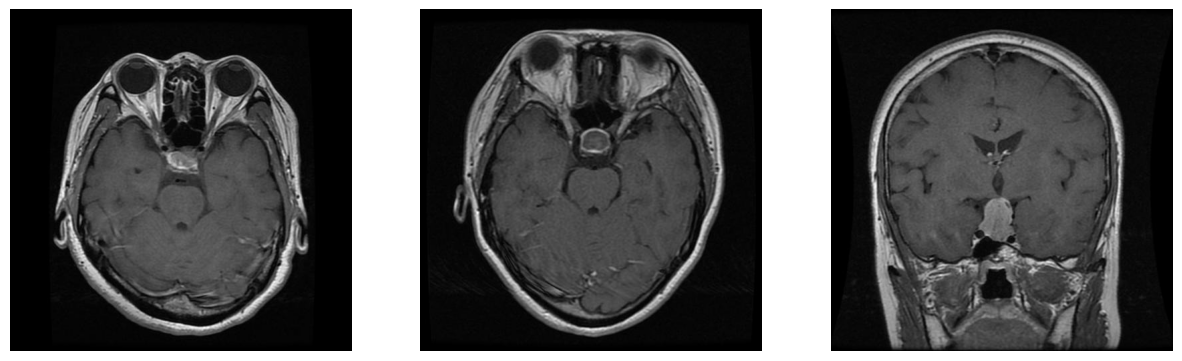

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to display sample images from each category
def display_sample_images(categories, base_dir, num_samples=3):
    for category in categories:
        category_dir = os.path.join(base_dir, category)
        sample_images = os.listdir(category_dir)[:num_samples]

        print(f"Category: {category}")
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
        for i, img_file in enumerate(sample_images):
            img_path = os.path.join(category_dir, img_file)
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.show()

# Display sample images from Training directory
display_sample_images(training_categories, training_dir)

<ipython-input-7-bfd31a19bdd4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_labels_df, palette='viridis')
<ipython-input-7-bfd31a19bdd4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=test_labels_df, palette='viridis')


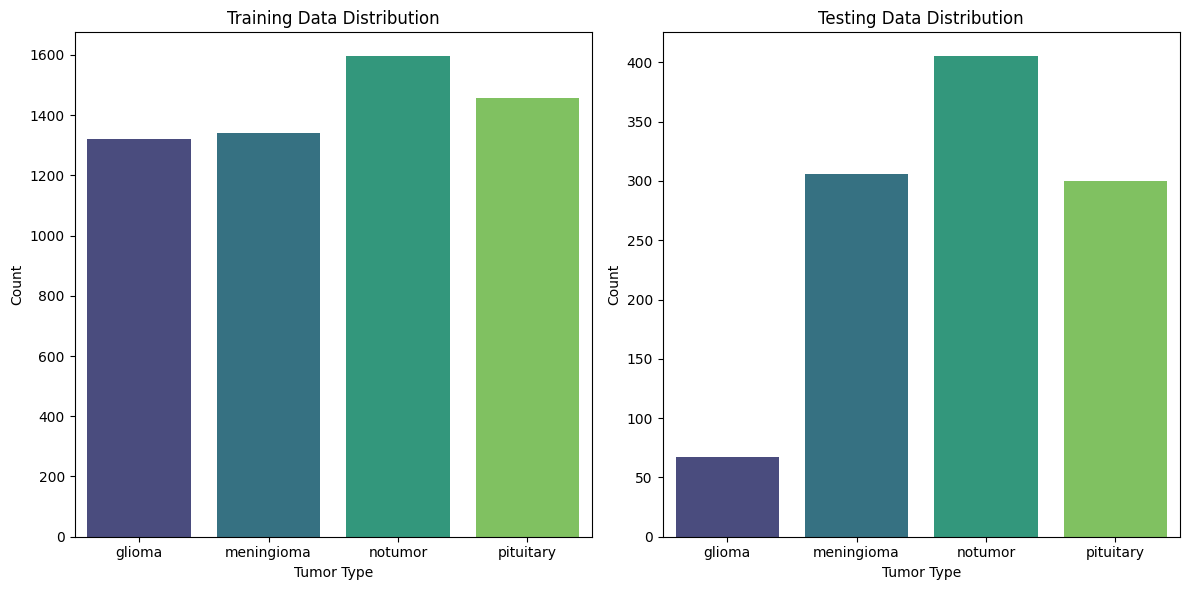

In [ ]:
import seaborn as sns
import pandas as pd

# Convert labels to DataFrame for visualization
train_labels_df = pd.DataFrame(train_labels, columns=['label'])
test_labels_df = pd.DataFrame(test_labels, columns=['label'])

# Map numerical labels to category names
label_map = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
train_labels_df['label'] = train_labels_df['label'].map(label_map)
test_labels_df['label'] = test_labels_df['label'].map(label_map)

# Visualize the distribution of categories in training and testing datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='label', data=train_labels_df, palette='viridis')
plt.title('Training Data Distribution')
plt.xlabel('Tumor Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='label', data=test_labels_df, palette='viridis')
plt.title('Testing Data Distribution')
plt.xlabel('Tumor Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Data preprocessing
This involve three major steps:
1. Loading the Images: Reading the images from the directories.
2. Resizing and Normalizing: Ensuring all images are of the same size and normalizing pixel values.
3. Augmentation: Optionally augmenting the data to improve model robustness.



Now we need to resize all images to a consistent size (224x224 pixels) to fit the input requirements of the models. Also we normalise the pixel value to a range of [0,1].

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Constants
IMG_SIZE = (224, 224)

# Function to preprocess images
def preprocess_images(base_dir, categories):
    data = []
    labels = []

    for category in categories:
        category_dir = os.path.join(base_dir, category)
        label = categories.index(category)
        for img_file in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_file)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
            data.append(img_array)
            labels.append(label)

    return np.array(data), np.array(labels)

# Preprocess training and testing data
train_data, train_labels = preprocess_images(training_dir, training_categories)
test_data, test_labels = preprocess_images(testing_dir, testing_categories)

# Display shapes of the preprocessed datasets
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", test_labels.shape)


Training data shape: (5712, 224, 224, 3)
Training labels shape: (5712,)
Testing data shape: (1078, 224, 224, 3)
Testing labels shape: (1078,)


From the graph, we can understand that the number of images in the training dataset is approximately four times the number of images in the test dataset for each category. There is a slightly larger number of samples in the "no tumor" category in both the training and test datasets. Apart from that, all other tumor categories have a similar number of images. The average number of sample images per category in the training set is around 1200, while in the test set, it is around 300.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 4  # glioma, meningioma, notumor, pituitary

# Data generators
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(training_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(testing_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

# Load the ResNet50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

Found 5712 images belonging to 4 classes.
Found 1078 images belonging to 4 classes.


In [ ]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
179/179 [==============================] - 91s 443ms/step - loss: 0.6429 - accuracy: 0.7437 - val_loss: 0.5216 - val_accuracy: 0.7941
Epoch 2/10
179/179 [==============================] - 78s 437ms/step - loss: 0.4006 - accuracy: 0.8473 - val_loss: 0.4234 - val_accuracy: 0.8404
Epoch 3/10
179/179 [==============================] - 78s 438ms/step - loss: 0.3486 - accuracy: 0.8682 - val_loss: 0.4436 - val_accuracy: 0.8386
Epoch 4/10
179/179 [==============================] - 79s 443ms/step - loss: 0.3140 - accuracy: 0.8836 - val_loss: 0.3273 - val_accuracy: 0.8729
Epoch 5/10
179/179 [==============================] - 79s 440ms/step - loss: 0.2840 - accuracy: 0.8894 - val_loss: 0.3325 - val_accuracy: 0.8748
Epoch 6/10
179/179 [==============================] - 79s 442ms/step - loss: 0.2770 - accuracy: 0.8960 - val_loss: 0.2826 - val_accuracy: 0.8942
Epoch 7/10
179/179 [==============================] - 79s 439ms/step - loss: 0.2513 - accuracy: 0.9051 - val_loss: 0.2851 - val_ac

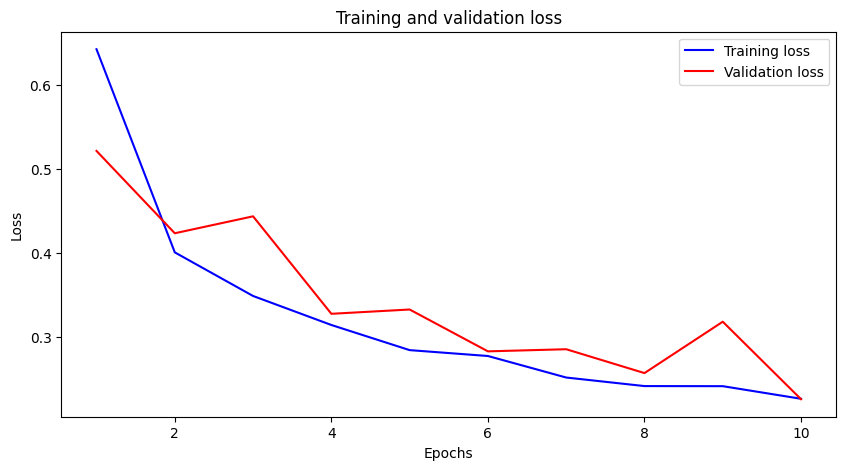

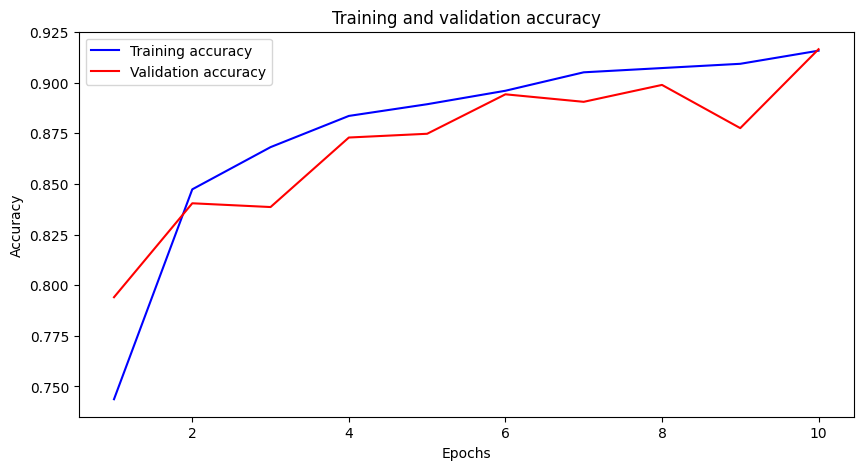

In [ ]:
import matplotlib.pyplot as plt

# Extracting data from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15  # Increase the number of epochs
NUM_CLASSES = 4  # glioma, meningioma, notumor, pituitary

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load the ResNet50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning: Unfreeze some layers
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator,
                    callbacks=[LearningRateScheduler(lr_scheduler)])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")


Found 5712 images belonging to 4 classes.
Found 1078 images belonging to 4 classes.
Epoch 1/15
179/179 [==============================] - 112s 463ms/step - loss: 0.3493 - accuracy: 0.8673 - val_loss: 0.1825 - val_accuracy: 0.9416 - lr: 1.0000e-04
Epoch 2/15
179/179 [==============================] - 81s 451ms/step - loss: 0.1444 - accuracy: 0.9473 - val_loss: 0.1495 - val_accuracy: 0.9471 - lr: 1.0000e-04
Epoch 3/15
179/179 [==============================] - 81s 450ms/step - loss: 0.1090 - accuracy: 0.9636 - val_loss: 0.0959 - val_accuracy: 0.9722 - lr: 1.0000e-04
Epoch 4/15
179/179 [==============================] - 81s 451ms/step - loss: 0.0860 - accuracy: 0.9734 - val_loss: 0.1283 - val_accuracy: 0.9601 - lr: 1.0000e-04
Epoch 5/15
179/179 [==============================] - 81s 451ms/step - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.0892 - val_accuracy: 0.9777 - lr: 1.0000e-04
Epoch 6/15
179/179 [==============================] - 80s 448ms/step - loss: 0.0640 - accuracy: 0.9804 - 

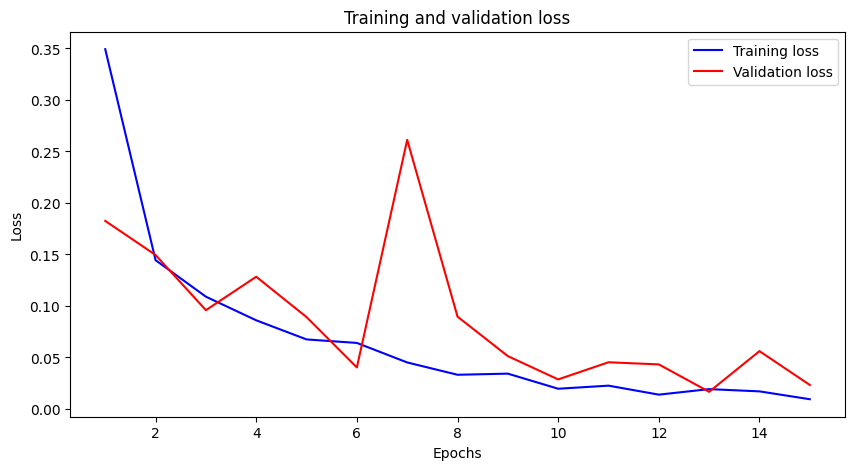

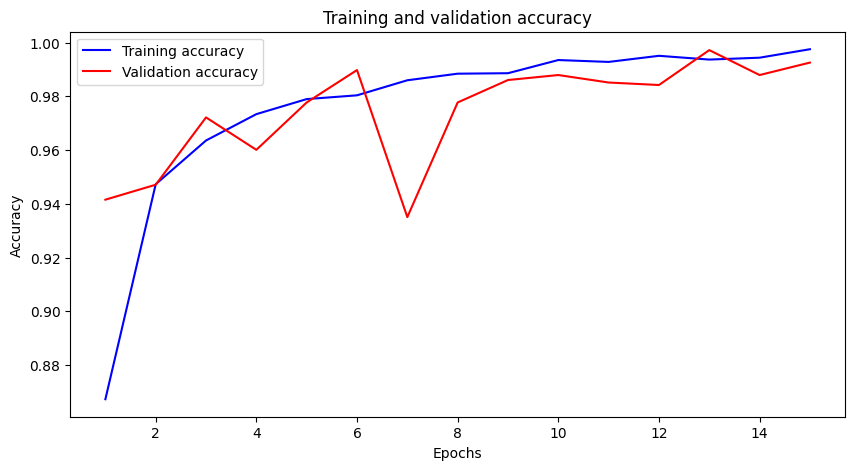

In [ ]:
#Extracting data from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
